In [1]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from torch import nn # contains all of Pytorch's building blocks for graphs

In [3]:
torch.__version__

'2.1.0+cu121'

## Preparing and loading

In [25]:
a = 0.3
B = 0.7
X = torch.arange(0,100,2).unsqueeze(dim=1)
y = a + B*X

### Splitting and Training Data Sets

In [26]:
train, test = 40, 30

In [29]:
train_X, train_Y = X[:train], y[:train]
test_X, test_Y = X[train:], y[train:]

In [30]:
len(train_X), len(train_Y), len(test_X), len(test_Y)

(40, 40, 10, 10)

In [31]:
def plot_predictions(train_data = train_X,
                    train_labels = train_Y,
                    test_data = test_X,
                    test_labels = test_Y,
                    predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

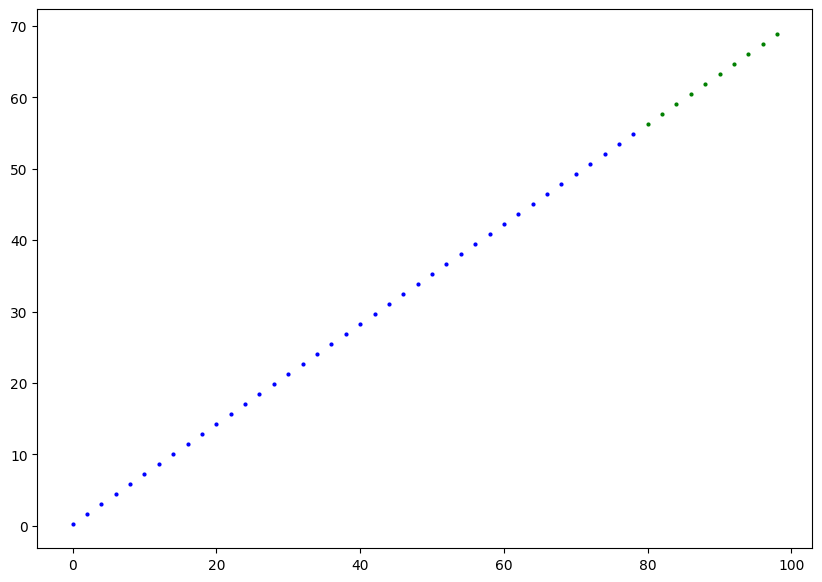

In [32]:
plot_predictions()

## Build model

In [34]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits in nn.Modules
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    ## forward() -> defines the computation of every call
    ## always need to overide the forward() function
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

Essential building models
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - defines what happens in the forward computation

### Checking the contents of our PyTorch model

In [39]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [40]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

In [42]:
with torch.inference_mode():
    y_preds = model_0(test_X)
y_preds

tensor([[27.0640],
        [27.7374],
        [28.4108],
        [29.0842],
        [29.7576],
        [30.4309],
        [31.1043],
        [31.7777],
        [32.4511],
        [33.1245]])

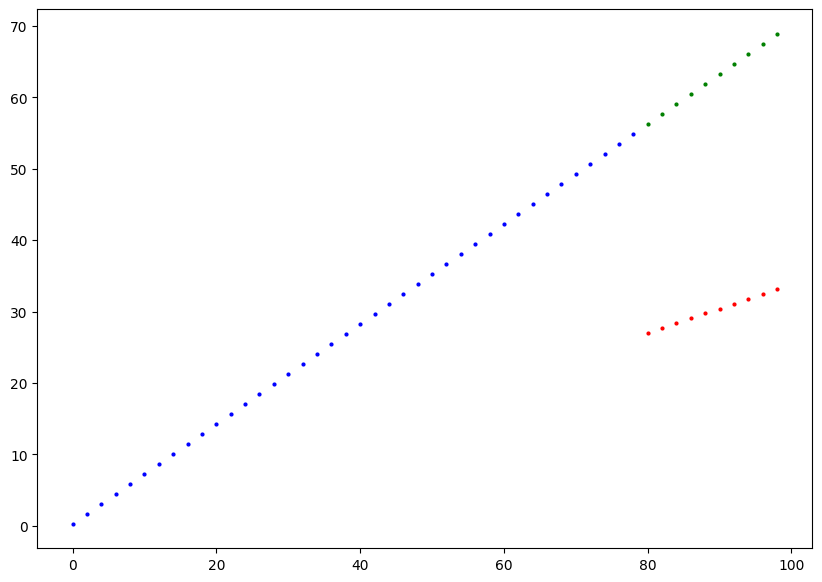

In [43]:
plot_predictions(predictions=y_preds)

Inference mode disables the useful things available of training. Makes the code faster.

### Adding loss function and optimizer

In [44]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

### Training loop

In [58]:
epochs = 100 # number of loops through the data
for epoch in range(epochs):
    model_0.train() # train mode in PyTorch
    y_pred = model_0(train_X)
    loss = loss_fn(y_pred, train_Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()

Optimizer: adjusts parameter values through the use of loss values

### Testing loop

In [59]:
with torch.inference_mode():
    test_pred = model_0(test_X)
    test_loss = loss_fn(test_pred, test_Y)
print(f"Loss: {loss} | Test loss : {test_loss}")

Loss: 12.676774978637695 | Test loss : 5.827730178833008


In [60]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.7657], requires_grad=True),
 Parameter containing:
 tensor([0.2813], requires_grad=True)]